In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
#!pip install yfinance

In [3]:
import yfinance as yf
stock_symbol = 'AAPL'


In [4]:
start = '2012-01-01'
end = '2022-10-08'
df = yf.download(tickers = stock_symbol, start = start, end=end )

[*********************100%***********************]  1 of 1 completed


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-03,138.210007,143.070007,137.690002,142.449997,142.214081,114311700
2022-10-04,145.029999,146.220001,144.259995,146.100006,145.858047,87830100
2022-10-05,144.070007,147.380005,143.009995,146.399994,146.157532,79471000
2022-10-06,145.809998,147.539993,145.220001,145.429993,145.189148,68402200
2022-10-07,142.539993,143.100006,139.449997,140.089996,139.857986,85925600


In [6]:
df = df.reset_index()

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.519278,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.586557,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.726295,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.859331,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.838936,394024400


In [8]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,14.621429,14.732143,14.607143,14.686786,302220800
1,14.642857,14.810000,14.617143,14.765714,260022000
2,14.819643,14.948214,14.738214,14.929643,271269600
3,14.991786,15.098214,14.972143,15.085714,318292800
4,15.196429,15.276786,15.048214,15.061786,394024400


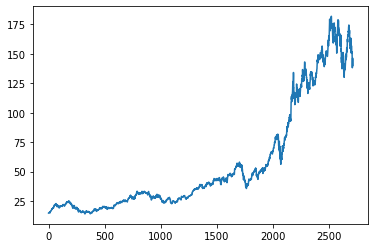

In [9]:
plt.plot(df.Close)

In [10]:
df

,Open,High,Low,Close,Volume
0,14.621429,14.732143,14.607143,14.686786,302220800
1,14.642857,14.810000,14.617143,14.765714,260022000
2,14.819643,14.948214,14.738214,14.929643,271269600
3,14.991786,15.098214,14.972143,15.085714,318292800
4,15.196429,15.276786,15.048214,15.061786,394024400
...,...,...,...,...,...
2705,138.210007,143.070007,137.690002,142.449997,114311700
2706,145.029999,146.220001,144.259995,146.100006,87830100
2707,144.070007,147.380005,143.009995,146.399994,79471000
2708,145.809998,147.539993,145.220001,145.429993,68402200


In [11]:
ma150 = df.Close.rolling(150).mean()
ma150

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2705    155.857667
2706    155.743667
2707    155.609267
2708    155.470600
2709    155.316733
Name: Close, Length: 2710, dtype: float64

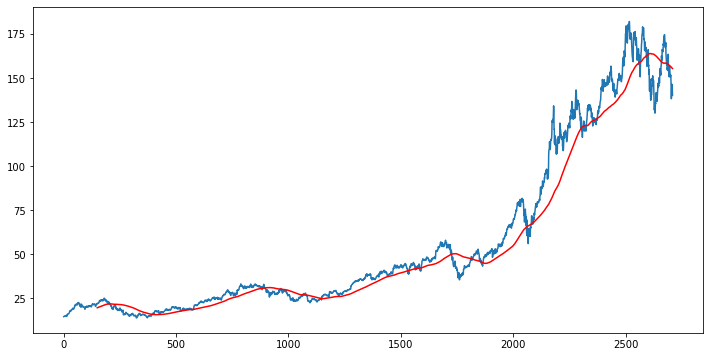

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma150,'red')

In [13]:
ma300 = df.Close.rolling(300).mean()
ma300

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2705    156.915367
2706    156.913133
2707    156.917867
2708    156.917167
2709    156.897933
Name: Close, Length: 2710, dtype: float64

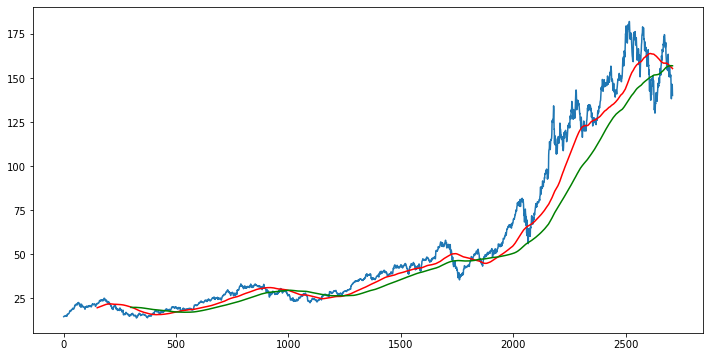

In [14]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma150,'red')
plt.plot(ma300, 'green')


In [15]:
df.shape

(2710, 5)

In [16]:
#splitting data into training and testing       

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1896, 1)
(814, 1)


In [17]:
data_training.head() 


,Close
0,14.686786
1,14.765714
2,14.929643
3,15.085714
4,15.061786


In [18]:
data_testing.head()

,Close
1896,51.415001
1897,50.647499
1898,51.805000
1899,52.209999
1900,52.167500


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [20]:
data_training_array = scaler.fit_transform(data_training)  
data_training_array


array([[0.01677525],
       [0.01856622],
       [0.02228596],
       ...,
       [0.84762877],
       [0.84360105],
       [0.83707738]])

In [21]:
x_train = []                    
y_train = [] 

for i in range(150, data_training_array.shape[0]):
    x_train.append(data_training_array[i-150: i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)


In [22]:
# ml model       
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential


In [23]:
model = Sequential() 

In [24]:
from keras.layers import Dense      
from keras.layers import LSTM
from keras.layers import Dropout

In [25]:
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))


In [26]:
model.summary()  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 150, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 150, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 150, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 150, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 150, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [27]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs= 50)

Epoch 1/50
55/55 [==============================] - 24s 343ms/step - loss: 0.0403
Epoch 2/50
55/55 [==============================] - 17s 312ms/step - loss: 0.0090
Epoch 3/50
55/55 [==============================] - 18s 323ms/step - loss: 0.0071
Epoch 4/50
55/55 [==============================] - 18s 320ms/step - loss: 0.0064
Epoch 5/50
55/55 [==============================] - 18s 320ms/step - loss: 0.0061
Epoch 6/50
55/55 [==============================] - 18s 323ms/step - loss: 0.0059
Epoch 7/50
55/55 [==============================] - 18s 321ms/step - loss: 0.0062
Epoch 8/50
55/55 [==============================] - 18s 333ms/step - loss: 0.0050
Epoch 9/50
55/55 [==============================] - 18s 321ms/step - loss: 0.0058
Epoch 10/50
55/55 [==============================] - 19s 348ms/step - loss: 0.0051
Epoch 11/50
55/55 [==============================] - 19s 336ms/step - loss: 0.0048
Epoch 12/50
55/55 [==============================] - 22s 392ms/step - loss: 0.0047
Epoch 13/50
5

In [28]:
model.save('keras_model.h5') 

In [29]:
data_testing.head()  

,Close
1896,51.415001
1897,50.647499
1898,51.805000
1899,52.209999
1900,52.167500


In [30]:
past_150_days = data_training.tail(150)  

In [32]:
final_df = past_150_days.append(data_testing, ignore_index = True)

C:\Users\anant\AppData\Local\Temp\ipykernel_20624\713208025.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_150_days.append(data_testing, ignore_index = True)


In [33]:
final_df.head()

,Close
0,42.157501
1,42.275002
2,42.737499
3,41.369999
4,40.985001


In [34]:
input_data = scaler.fit_transform(final_df) 
input_data

array([[0.04513101],
       [0.04593327],
       [0.04909106],
       [0.03975419],
       [0.03712555],
       [0.0407613 ],
       [0.03191943],
       [0.02498933],
       [0.0145771 ],
       [0.00792012],
       [0.02556968],
       [0.02382861],
       [0.02396517],
       [0.02654264],
       [0.02684987],
       [0.        ],
       [0.010361  ],
       [0.00979771],
       [0.01461125],
       [0.01898096],
       [0.01981736],
       [0.01723989],
       [0.01333105],
       [0.01857132],
       [0.02176325],
       [0.02333362],
       [0.02497227],
       [0.0189639 ],
       [0.02002218],
       [0.01793974],
       [0.02657676],
       [0.02408467],
       [0.02131943],
       [0.03936161],
       [0.04139285],
       [0.04152941],
       [0.04960314],
       [0.05460441],
       [0.05470684],
       [0.049074  ],
       [0.04816933],
       [0.04649653],
       [0.04898865],
       [0.04777672],
       [0.04883503],
       [0.04818639],
       [0.04905691],
       [0.050

In [35]:
input_data.shape  

(964, 1)

In [36]:
x_test = []                   
y_test = []

for i in range(150, input_data.shape[0]):
    x_test.append(input_data[i-150: i])
    y_test.append(input_data[i, 0])

In [37]:
x_test, y_test = np.array(x_test), np.array(y_test)  
print(x_test.shape)
print(y_test.shape)

(814, 150, 1)
(814,)


In [38]:
# making predictions              
 
y_predicted = model.predict(x_test)

26/26 [==============================] - 5s 138ms/step


In [39]:
y_predicted.shape 

(814, 1)

In [40]:
y_test  

array([0.10833832, 0.10309806, 0.11100111, 0.11376632, 0.11347614,
       0.11065973, 0.11188872, 0.11520012, 0.11366391, 0.12093538,
       0.11306647, 0.10553897, 0.08730903, 0.09355637, 0.09703848,
       0.10453186, 0.100367  , 0.09949645, 0.11398822, 0.10337117,
       0.10164719, 0.10977213, 0.11634379, 0.11636084, 0.12025262,
       0.11994539, 0.10318341, 0.10975507, 0.10577794, 0.10811641,
       0.11405649, 0.11359564, 0.10840658, 0.11436375, 0.12134505,
       0.12131091, 0.12286421, 0.12718272, 0.13894341, 0.13808995,
       0.13068192, 0.13264487, 0.13401041, 0.13754375, 0.13445422,
       0.12894085, 0.13063071, 0.1288555 , 0.1345737 , 0.13262781,
       0.13080141, 0.13959205, 0.14065033, 0.13104038, 0.13421526,
       0.14478108, 0.14486643, 0.14032601, 0.14481523, 0.1500384 ,
       0.16048478, 0.15990441, 0.15896562, 0.15734402, 0.15889733,
       0.16082616, 0.16782452, 0.16688574, 0.172382  , 0.17306478,
       0.17818555, 0.18240165, 0.17256976, 0.17251856, 0.18190

In [41]:
y_predicted 

array([[0.15373841],
       [0.15409517],
       [0.154429  ],
       [0.15475868],
       [0.15511905],
       [0.1555362 ],
       [0.15600848],
       [0.15652588],
       [0.15708786],
       [0.15768364],
       [0.15833226],
       [0.15901184],
       [0.1596517 ],
       [0.1601004 ],
       [0.1602506 ],
       [0.16006348],
       [0.15958495],
       [0.15887858],
       [0.15801254],
       [0.15712333],
       [0.1562913 ],
       [0.15555343],
       [0.15496147],
       [0.15458462],
       [0.15447047],
       [0.15465426],
       [0.15513997],
       [0.15582046],
       [0.15659642],
       [0.15736571],
       [0.15805621],
       [0.15865126],
       [0.15915582],
       [0.15955876],
       [0.15987873],
       [0.16017619],
       [0.16050941],
       [0.16092613],
       [0.16147411],
       [0.1622432 ],
       [0.16329321],
       [0.16459718],
       [0.16609572],
       [0.16771959],
       [0.16941449],
       [0.17111196],
       [0.1727157 ],
       [0.174

In [42]:
scaler.scale_ 

array([0.00682769])

In [43]:
scale_factor = 1/0.00682769        
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

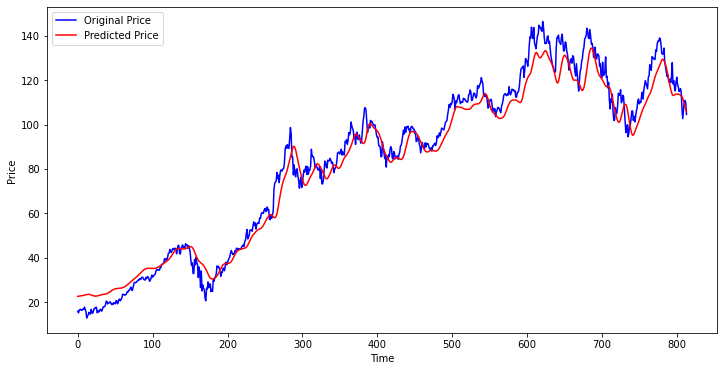

In [44]:
plt.figure(figsize=(12,6))                 
plt.plot(y_test , 'blue', label = 'Original Price')
plt.plot(y_predicted , 'red' , label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()